# Project no.1 - 2023: Multilayer Perceptron (MLP) NN for the Fashion-MNIST dataset -  Assignments


## <div style="text-align: center"> Name & Surname 

### Date xxxxxx </div>

---


# Introduction
The aim of the project is the construction, analysis and documentation of a MultiLayer Perceptron (MLP) Neural Network (NN) for the supervised classification of cloth images from the Fashion-MNIST archive.

The dataset is composed of 70,000 grayscale images with 28x28 pixel resolution, to be classified into 10 categories (labels, classes).

The network topology is the following:

    Input layer with 28x28 = 784 nodes
    Hidden layer with 392 nodes
    Linear (fully connected) layer with 10 nodes;

The input layer has 784 nodes, each one encoding an input image pixel.
The output, fully-connected layer has 10 nodes, one for each category. 

This report is structured according to the following design methodology:

    1. Data loading and preparation 
    2. Data exploration
    3. The MLP model and network architecture
    4. The training phase
    5. Final tests and performance evaluations
    References



# 1.- Data loading and preparation

## 1.1- Importing the software library modules

In [ ]:
!pip install torch_inspect

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch_inspect as ti

from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.2- Defining the hyperparameters

In [ ]:
# Hyperparameters
# ----------             Assignment to be run last (i.e, no.8), after those that follow: Change the hyperparameter settings and run the procedure again and again. 
# ----------             Set NUM_EPOCHS = 10; BATCH_SIZE = 200 and discuss the results.
# NUM_EPOCHS = 5
# LEARNING_RATE = 0.001
# BATCH_SIZE = 100

# if available use GPU, else use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## 1.3- Loading the datasets

Loading the Fashion MNIST dataset, and preparing the sets using the pytorch module 'torchvision.datasets'. The training set contains 60,000 data samples; the test set 10,000 samples.


In [ ]:


train_set = torchvision.datasets.FashionMNIST(
    root="./data", 
    download=True, 
    # converting image pixel data to tensors
    transform=transforms.Compose([transforms.ToTensor()])
    )
test_set = torchvision.datasets.FashionMNIST(
    root="./data", 
    download=True, 
    train=False, 
    # converting image pixel data to tensors
    transform=transforms.Compose([transforms.ToTensor()])
    )  

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=BATCH_SIZE
    )
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=BATCH_SIZE
    )

# Check the training set and test set sizes
# -----                                    Assignment 1:  print the training and test set sizes

Training set size: 60000
Test set size: 10000


# 2.- Data exploration 


## 2.1 Manually insert indices and names of the data labels

In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trousers",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

    

## 2.2  Visualize one image sample per class


<class 'torch.Tensor'>
torch.Size([1, 1, 28, 28])


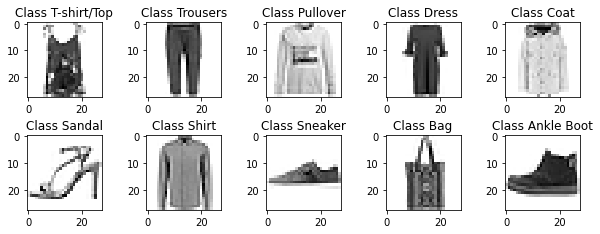

In [ ]:
# Print the image dimensions
demo_loader = torch.utils.data.DataLoader(train_set)

batch = next(iter(demo_loader))
images, labels = batch

print(type(images))
print(images.shape)

samples = enumerate(train_loader)
batch_idx, (sample_data, sample_targets) = next(samples)
sample_data_len = len(sample_data) 

classes = torch.unique(sample_targets)
numclasses = len(classes)

# Visualize one image sample per class 
figure = plt.figure(figsize=(10,20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
cols, rows = 5, 10


for i in range(1, sample_data_len):
    img, label = sample_data[i-1], sample_targets[i-1]
  

    for j in range(1,11):
    
      if label == (j-1):    
         plt.subplot(rows, cols, j)
         plt.title("Class {}".format(output_label(label)))
         plt.imshow(sample_data[i-1][0], cmap='gray_r', interpolation='none')
         
plt.show()


## 2.3  Visualize 20 randomly-selected images into a 4x5 grid

Labels:
T-shirt/Top
Trousers
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot
sample_data length:  100
batch_idx:  0
sample_targets length:  100
sample_targets:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1,
        6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6,
        4, 1, 1, 8])


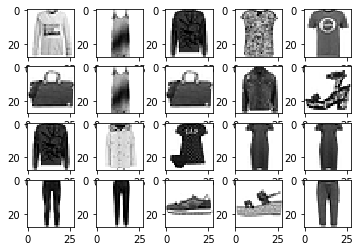

In [ ]:
import random
# Write the code to visualize 20 random images into a 4x5 grid.
# 1. Take the images from example_data.
# 2. The code to show the first image in example_data is
#    plt.imshow(example_data[0][0], cmap='gray_r', interpolation='none')
#    plt.show()

samples = enumerate(train_loader)
batch_idx, (sample_data, sample_targets) = next(samples)
sample_data_len = len(sample_data) 

classes = torch.unique(sample_targets)

print("Labels:")

for i in range(10):
 label = classes[i]
 print(output_label(label))

print("sample_data length: ", sample_data_len)
print("batch_idx: ", batch_idx)
print("sample_targets length: ", len(sample_targets))
print("sample_targets: ",sample_targets)

# Create a list of 20 random numbers
randomlist = []
for i in range(0,20):
   n = random.randint(1,sample_data_len)
   randomlist.append(n)

# Visualize 20 random images
   for i in range(len(randomlist)):
    plt.subplot(4, 5, i+1)
    plt.imshow(sample_data[randomlist[i]][0], cmap='gray_r', interpolation='none')
plt.show()

## 2.4  Summarize the number of images in a class and show the summary

In [ ]:
# calculate the number of samples in each class:
#   * torch.unique returns the unique elements of the input tensor;
_, imgs_per_class = torch.unique(sample_targets, return_counts=True)

#-------------                   Assignment 2: print the number of elements per class


[12 11  9 15  9 11 10  8  4 11]
There are 12 elements in the class T-shirt/Top
There are 11 elements in the class Trousers
There are 9 elements in the class Pullover
There are 15 elements in the class Dress
There are 9 elements in the class Coat
There are 11 elements in the class Sandal
There are 10 elements in the class Shirt
There are 8 elements in the class Sneaker
There are 4 elements in the class Bag
There are 11 elements in the class Ankle Boot


## 2.5   Print the resolution of the first image in each class

In [ ]:
# Create a list with the indices of the first image of each class. 

my_dict={}
  
for i in range(10):
   my_dict[i]=output_label(i)

print("Dictionary: ",my_dict)

my_list=[]
my_list.append(0)

for i in range(1, numclasses):
  my_list.append(my_list[i-1]+imgs_per_class.numpy()[i-1])

print("Resolution of the first image in the class:")
for i in range(0, len(my_list)):
  img = sample_data[my_list[i]]
  height = img.shape[1] # height
  width = img.shape[2] # width
  print(my_dict[i]+" is -> "+str(height)+"x"+str(width))


Dictionary:  {0: 'T-shirt/Top', 1: 'Trousers', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
Resolution of the first image in the class:
T-shirt/Top is -> 28x28
Trousers is -> 28x28
Pullover is -> 28x28
Dress is -> 28x28
Coat is -> 28x28
Sandal is -> 28x28
Shirt is -> 28x28
Sneaker is -> 28x28
Bag is -> 28x28
Ankle Boot is -> 28x28


## 2.6 Show five images per class

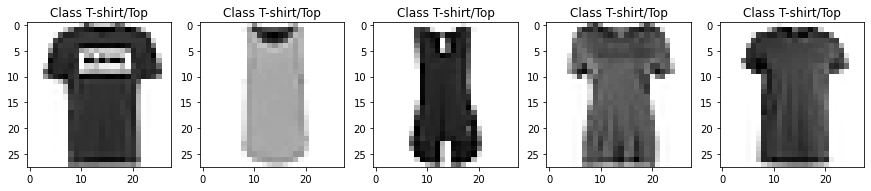

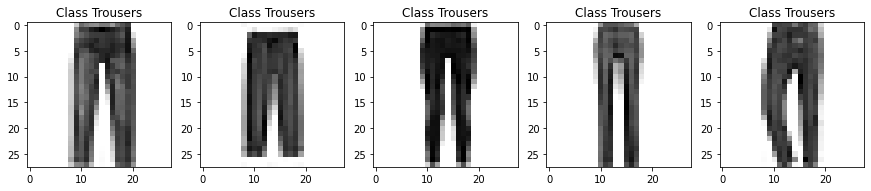

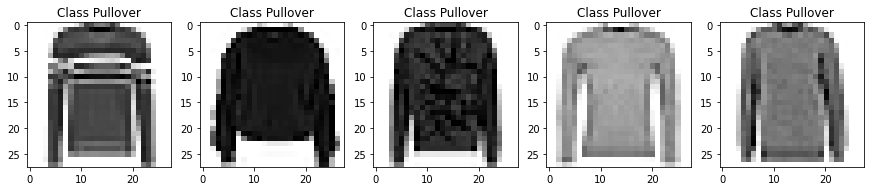

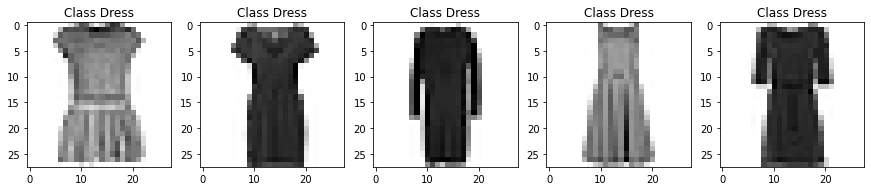

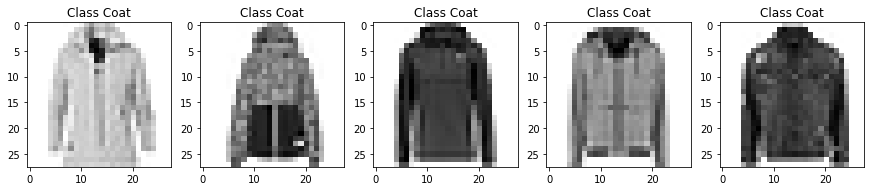

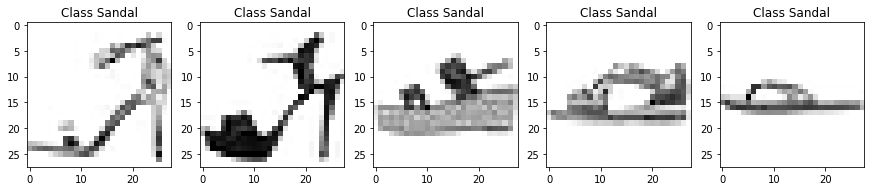

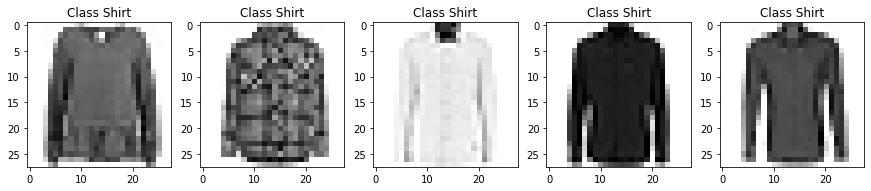

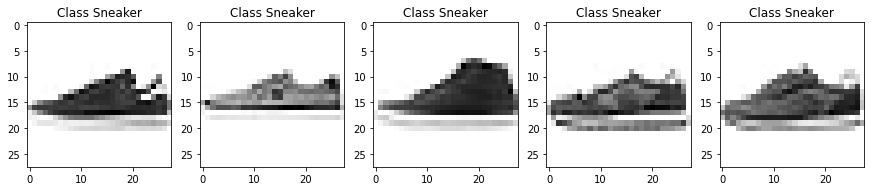

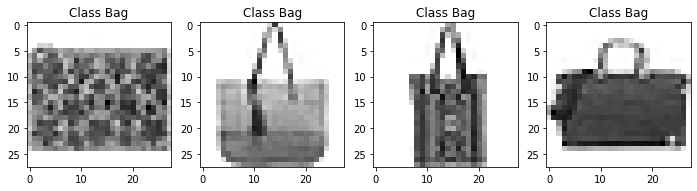

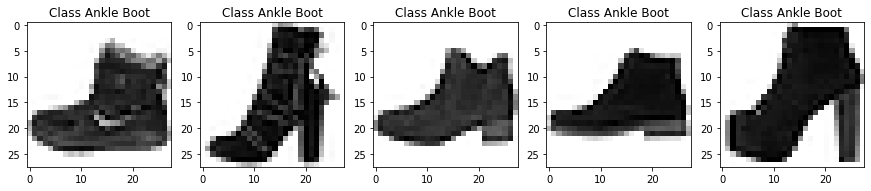

In [ ]:
# Print five images per class
# WARNING:  the images in the dataset are NOT ordered by their classes

class_list=[]
class_list.append(0)

for j in range(1,11):

  count=0
  figure = plt.figure(figsize=(15,20))
  rows, cols = 1, 5

  for i in range(1, sample_targets.shape[0]+1):
        
  # --------------                      Assignment 3: Print five images per class in a 10x5 grid         




#3.- The MLP network model and architecture

##3.1  The network is cast into the following layers:

### Input layer with 28x28 = 784 nodes
### Hidden layer with 392 nodes
### Output fully-connected layer with 10 nodes;



In [ ]:
class MLPFashionANN(nn.Module):

    def __init__(self):
        super(MLPFashionANN, self).__init__()

        n_input = 784
        n_hidden = 392
        n_output = 10

        self.hidden = nn.Linear(n_input, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        # The forward function computes the 
        # output tensors from the input ones.
        #
        # Complete the code by listing the layers in 
        # the correct order and passing the input 
        # through them. In this way the network
        # architecture has been fully defined
        #

        out = self.hidden(x)
        out = self.output(out)
        
        return out

# check the model spatial layout (topology)
model = MLPFashionANN()
print(model)


MLPFashionANN(
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)


# 4.-   The Training Phase 


In [ ]:
model.to(device)

# Loss function
error = nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Initialize 'count', the number of iterations
count = 0
# Initialize lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []
predictions_list = []


for epoch in range(NUM_EPOCHS):
  
     for images, labels in train_loader:
         # Transferring images and labels to GPU if available
         images, labels = images.to(device), labels.to(device)
      
         #train = Variable(images.view(100, 1, 28, 28))
         train = Variable(images.view(BATCH_SIZE, -1))
         labels = Variable(labels)
          
         # Forward pass 
         out = model(train)
         loss = error(out, labels)
         
         # Initializing a gradient as 0 so there is no 
         # mixing of gradients among the batches
         optimizer.zero_grad()
          
         # Propagating the error backward
         loss.backward()
          
         # Optimizing the parameters
         optimizer.step()
      
         count += 1

         # Estimating the performances of training
      
         if not (count % 30): # It's the same as "if count % 30 == 0"
             total = 0
             correct = 0
         
             for images, labels in test_loader:
                 images, labels = images.to(device), labels.to(device)
             
                 test = Variable(images.view(BATCH_SIZE, -1))
             
                 outputs = model(test)
             
                 predictions = torch.max(outputs, 1)[1].to(device)
                 predictions_list.append(predictions)
                 correct += (predictions == labels).sum()
              
                 total += len(labels)
                 

             accuracy = correct * 100 / total
             #loss_list.append(loss.data)
             loss_list.append(loss.cpu().data)
             iteration_list.append(count)
             #accuracy_list.append(accuracy)
             accuracy_list.append(accuracy.cpu().data)
         
     print("Epoch: {}, Loss: {:.3f}, Accuracy: {:.2f}%".format(
         epoch+1, loss.data, accuracy
         )
     )

      # Saving the model
torch.save(model, "saved_FashionMNIST_MLP.pt")


Epoch: 1, Loss: 0.417, Accuracy: 82.27%
Epoch: 2, Loss: 0.386, Accuracy: 83.83%
Epoch: 3, Loss: 0.376, Accuracy: 84.20%
Epoch: 4, Loss: 0.370, Accuracy: 84.32%
Epoch: 5, Loss: 0.365, Accuracy: 84.23%


## 4.1  Performance visualizations of training 

### Loss and accuracy curves

Plot the loss and accuracy curves during training by using the data stored in `iteration_list`, `loss_list` and `accuracy_list`.

On the x-axis the number of iterations. Having a training set of 60 000 elements, a batch size of 100 and 5 epochs, the total number of iterations is 3000. 

$\text{number of batches} = \dfrac{\text{samples}}{\text{batch size}} = \dfrac{60000}{100} = 600$

$\text{number of iterations} = \text{epochs} \times \text{number of batches} = 5 \times 600 = 3000$

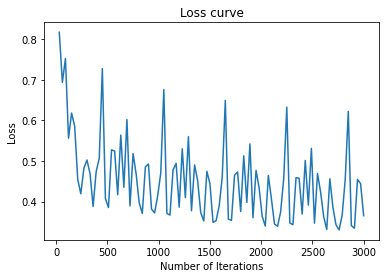

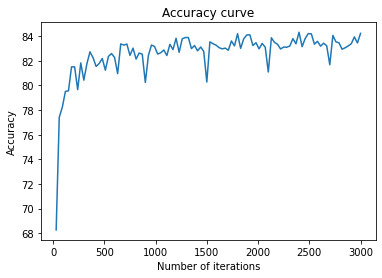

In [ ]:
# Visualize the loss curve
#                               Assignment 4: show the loss curve


# Visualize the accuracy curve
#                               Assignment 5: show the accuracy curve

# 5.- Final tests and performance evaluations

## 5.1 Accuracy of classification

In [ ]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]
predictions_list = []
totaccuracy = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
      
        test = Variable(images.view(BATCH_SIZE, -1))
        outputs = model(test)
       
        predicted = torch.max(outputs, 1)[1]
        predictions_list.append(predicted)
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
            
        
for i in range(10):
#--------------                   Assigment 6: print the accuracy of each single class; print the overall accuracy



Accuracy of T-shirt/Top: 87.40%
Accuracy of Trousers: 95.80%
Accuracy of Pullover: 69.30%
Accuracy of Dress: 86.30%
Accuracy of Coat: 78.30%
Accuracy of Sandal: 91.60%
Accuracy of Shirt: 49.60%
Accuracy of Sneaker: 95.00%
Accuracy of Bag: 94.90%
Accuracy of Ankle Boot: 94.10%
Overall accuracy: 84.23%


## 5.2 Classifying random images from the test set

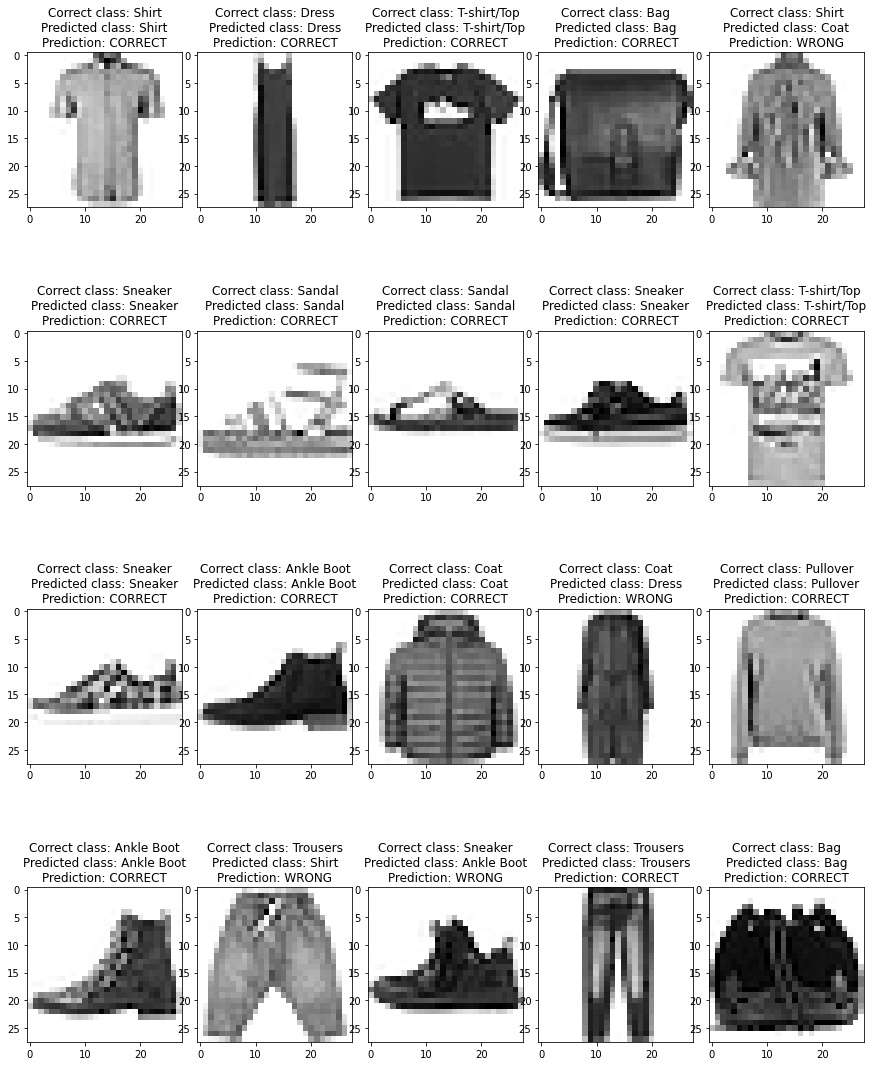

In [ ]:
from numpy.ma import right_shift
import random

# Visualize 20 random images into a 4x5 grid.
# 1. Take the images from example_data. Notice its shape and dimensions.
# 2. The code to show the first image in example_data is
#    plt.imshow(example_data[0][0], cmap='gray_r', interpolation='none')
#    plt.show()

example_data_len = 99

# Create a list of 20 random numbers
randomlist = []
for i in range(0,20):
   n = random.randint(1,example_data_len)
   randomlist.append(n)

figure = plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Visualize 20 randomly-selected images
for i in range(len(randomlist)):
   plt.subplot(4, 5, i+1)

   label = labels[i]

   if label == predicted[i]:
      pred = "CORRECT"
   else:
      pred = "WRONG"

   plt.title("Correct class: {}\nPredicted class: {}\nPrediction: {}". format(output_label(label),
                                                                              output_label(predicted[i]), 
                                                                              pred))   
#------                          Assignment 7: show the classified random images
plt.show()



---
## References

1. [Fashion MNIST with PyTorch](https://www.kaggle.com/pankajj/fashion-mnist-with-pytorch-93-accuracy)

2. [MNIST Handwritten Digit Recognition in PyTorch](https://nextjournal.com/gkoehler/pytorch-mnist)